# Dice and Chupitos
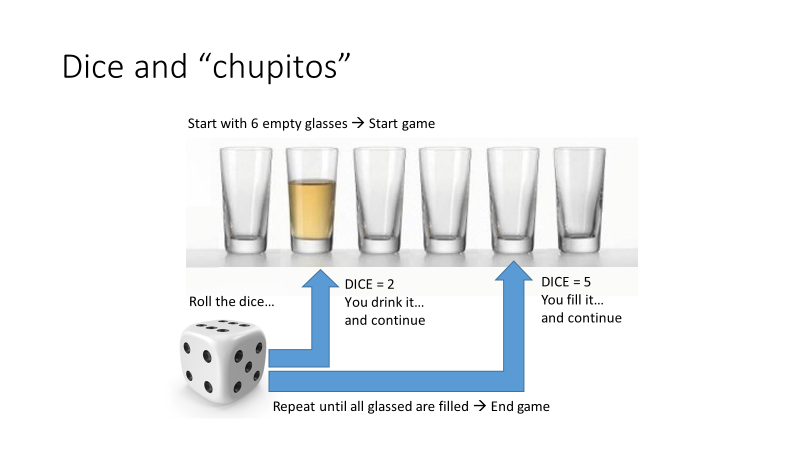

**Question**: How long (expected average of throws) will the game last and how many "chupitos" would you have drunk?

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
# Import the MarkovChain class from markovchain.py
from markovchains import MarkovChain

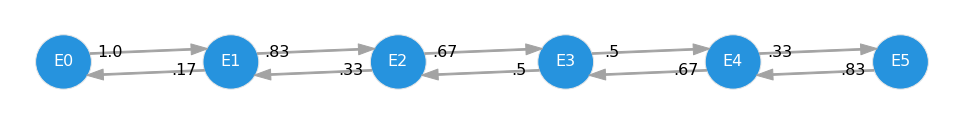

In [2]:
# Transition matrix
M = 1/6*np.array([
    [0, 6, 0, 0, 0, 0], 
    [1, 0, 5, 0, 0, 0], 
    [0, 2, 0, 4, 0, 0], 
    [0, 0, 3, 0, 3, 0], 
    [0, 0, 0, 4, 0, 2], 
    [0, 0, 0, 0, 5, 0] # and 1 chance to end the game
])
mc = MarkovChain(M, ['E0', 'E1', 'E2', 'E3', 'E4', 'E5'])
mc.build_network(pos=[[-6,0],[-3,0],[0,0],[3,0],[6,0],[9,0]])
mc.draw()

## Expected "episode" length

In [3]:
I = np.identity(6)
QE = np.linalg.inv(I - M)
E = np.matmul(QE,np.ones(6))
E

array([83.2, 82.2, 80.8, 78.6, 74.4, 63. ])

## Expected "episode" length and "reward"

$$
  M_{6\times6} = \frac{1}{6}·
  \left[ {\begin{array}{ccccc}
    0 & 6 &   &   &   &   \\
    1 & 0 & 5 &   &   &   \\
      & 2 & 0 & 4 &   &   \\
      &   & 3 & 0 & 3 &   \\
      &   &   & 4 & 0 & 2 \\
      &   &   &   & 5 & 0 \\
  \end{array} } \right]
$$

$E_0 = 1 + \frac{6}{6}E_1 \\
E_1 = 1 + \frac{1}{6}E_0 + \frac{5}{6}E_2 \\
E_2 = 1 + \frac{2}{6}E_1 + \frac{4}{6}E_3 \\
E_3 = 1 + \frac{3}{6}E_2 + \frac{3}{6}E_4 \\
E_4 = 1 + \frac{4}{6}E_3 + \frac{2}{6}E_5 \\
E_5 = 1 + \frac{5}{6}E_4$
$$(I-M)·
\begin{bmatrix} E_0 \\ E_1 \\ \vdots \\ E_5 \\ \end{bmatrix} = 
\begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} $$
$R_0 = \frac{6}{6}R_1 \\
R_1 = \frac{1}{6}(1 + R_0) + \frac{5}{6}R_2 \\
R_2 = \frac{2}{6}(1 + R_1) + \frac{4}{6}R_3 \\
R_3 = \frac{3}{6}(1 + R_2) + \frac{3}{6}R_4 \\
R_4 = \frac{4}{6}(1 + R_3) + \frac{2}{6}R_5 \\
R_5 = \frac{5}{6}(1 + R_4)$
$$(I-M)·
\begin{bmatrix} R_0 \\ R_1 \\ \vdots \\ R_5 \\ \end{bmatrix} = 
\frac{1}{6}·\begin{bmatrix} 0 \\ 1 \\ \vdots \\ 5 \end{bmatrix} $$

In [4]:
I = np.identity(6)
QE = np.linalg.inv(I - M)
R = np.matmul(QE,1/6*np.array([0,1,2,3,4,5]))
R

array([38.6, 38.6, 38.4, 37.8, 36.2, 31. ])

## Brute force simulation

In [5]:
import numpy as np
import random
import numba

@numba.jit
def run_tests(runs=250000):
    episodes = []
    rewards = []
    for j in range(runs):
        glasses = np.array([0,0,0,0,0,0]) # all empty
        episode = 0
        reward = 0
        # BASIC GAME
        while True:
            a = random.randint(0,5) # Return a number between A and B (both included)
            episode += 1
            if glasses[a]==0:
                glasses[a]=1
            else:    
                glasses[a]=0
                reward += 1
            if glasses.sum()==6:
                break

        episodes.append(episode)
        rewards.append(reward)
        # print(episode,reward)
    return episodes,rewards

episodes, rewards = run_tests()
print('FINISHED',np.array(episodes).mean(),np.array(rewards).mean())

FINISHED 83.111576 38.555788


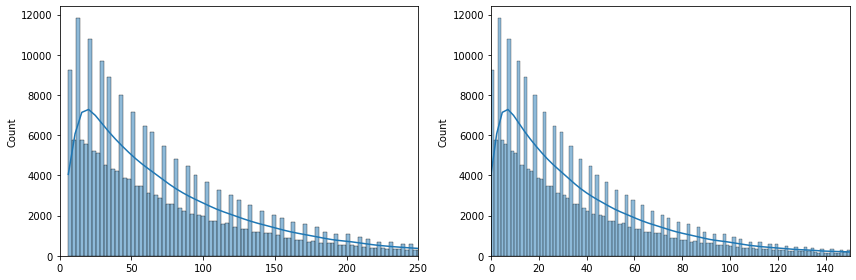

In [6]:
import matplotlib.pyplot as plt
# https://seaborn.pydata.org/generated/seaborn.displot.html
import seaborn as sns

plt.rcParams["figure.figsize"] = [12, 4]
plt.rcParams["figure.autolayout"] = True
#plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
axes[0].set(xlim =(0,250))
axes[1].set(xlim =(0,150))
#plt.figure(figsize=(12,12))

sns.histplot(episodes,kde=True, ax=axes[0])
sns.histplot(rewards,kde=True, ax=axes[1])
plt.show()